
<p style="background-color:purple; font-family:newtimeroman; color:#FFF9ED; font-size:200%; text-align:center; border-radius:20px; padding:20px;"><strong>Mask & Nomask -CNN classification.</strong></p>



<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover"><span style="font-size: 20px;">AIM : </span>

- The aim of the project is to use CNN and Deep learning techniques to automatically classify Image Data
- documents related to images face, leveraging a dataset of image data.
- This allows the system to adapt to evolving faces image as mask and no mask.

<a id="2"></a>
## <p style="background-color:#B61151; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> LIBRARIES NEEDED IN THE STUDY<p>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
import os


<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:black; background-color:#dfa8e4; font-size: 16px; border-width: 2px; font-weight: bold;" data-toggle="popover">
<span style="font-size: 20px;">CNN</span></a>

###  In a project context, you could succinctly define CNN as "the branch of artificial intelligence (AI)focused on enabling computers to understand,interpret, human Image."

In [2]:
path1=r'D:\dataset'
cate=['with_mask','without_mask']
image_size=200
input_image1=[]
for i in cate:
    folders=os.path.join(path1,i)
    label=cate.index(i)# tell software which image is cat and which one is dog
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path) # using cv2 iam reading the image and storing in
        image_array=cv2.resize(image_array,(image_size,image_size))
        input_image1.append([image_array,label ])
    
        
    


In [3]:
len(input_image1)

440

In [4]:
x=[]
y=[]
for x_values,labels in input_image1:
    x.append(x_values)
    y.append(labels)

In [5]:
x=np.array(x)
y=np.array(y)

In [6]:
x=x/255

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [8]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())  
model.add(Dense(128, activation='relu',input_shape=x.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [10]:
model.fit(x_train,y_train,epochs=5,batch_size=20,validation_split=0.002)

Epoch 1/5


18/18 [==============================] - 4s 187ms/step - loss: 15.4990 - accuracy: 0.5242 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
18/18 [==============================] - 3s 178ms/step - loss: 1.6192 - accuracy: 0.7607 - val_loss: 5.5965e-04 - val_accuracy: 1.0000
Epoch 3/5
18/18 [==============================] - 3s 179ms/step - loss: 0.6781 - accuracy: 0.8348 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 4/5
18/18 [==============================] - 3s 177ms/step - loss: 0.2584 - accuracy: 0.9202 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 5/5
18/18 [==============================] - 3s 177ms/step - loss: 0.2232 - accuracy: 0.9145 - val_loss: 0.0226 - val_accuracy: 1.0000


In [11]:
df=pd.DataFrame(model.history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,15.498975,0.524217,0.000000,1.0
1,1.619210,0.760684,0.000560,1.0
2,0.678116,0.834758,0.021140,1.0
3,0.258434,0.920228,0.007102,1.0
4,0.223169,0.914530,0.022580,1.0


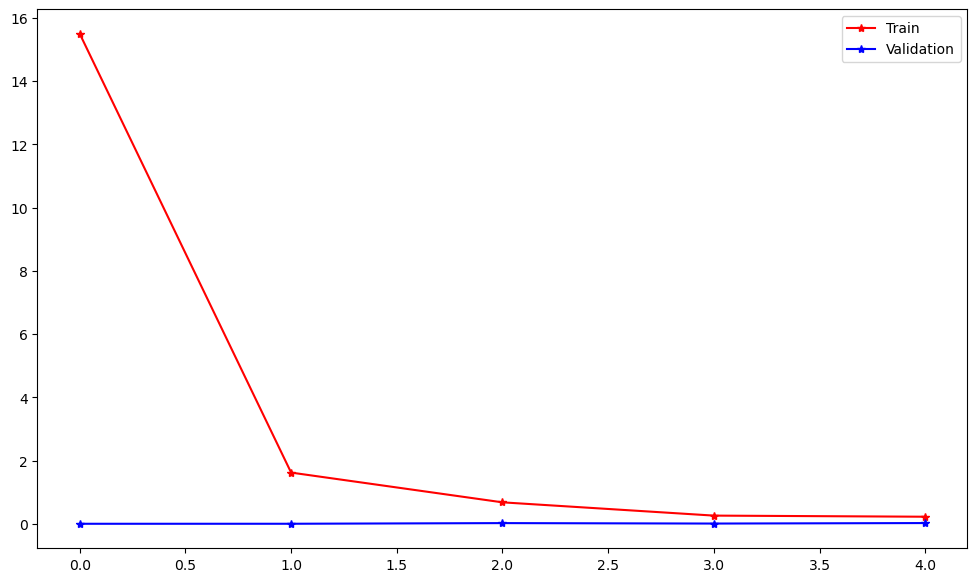

In [12]:
plt.figure(figsize=(12,7))
plt.plot(df.loss,color='red',label='Train',marker="*")
plt.plot(df.val_loss,color='blue',label='Validation',marker="*")
plt.legend();

In [13]:
pred=model.predict(x_test)
pred

3/3 [==============================] - 0s 30ms/step


array([[9.40613210e-01, 5.93868047e-02],
       [9.87353861e-01, 1.26461331e-02],
       [9.97579396e-01, 2.42067571e-03],
       [1.54626638e-01, 8.45373392e-01],
       [9.55495536e-01, 4.45044674e-02],
       [9.48774636e-01, 5.12253605e-02],
       [9.96156991e-01, 3.84300016e-03],
       [8.50750566e-01, 1.49249494e-01],
       [5.78534268e-02, 9.42146540e-01],
       [9.85657871e-01, 1.43421600e-02],
       [5.00977598e-02, 9.49902296e-01],
       [9.77091730e-01, 2.29083225e-02],
       [8.01719069e-01, 1.98280886e-01],
       [1.25882581e-01, 8.74117434e-01],
       [6.27403930e-02, 9.37259555e-01],
       [5.88930786e-01, 4.11069155e-01],
       [7.69005865e-02, 9.23099458e-01],
       [9.94791269e-01, 5.20873116e-03],
       [5.26001930e-01, 4.73998129e-01],
       [1.32022530e-01, 8.67977440e-01],
       [9.92447019e-01, 7.55298324e-03],
       [3.16482298e-02, 9.68351781e-01],
       [1.14106156e-01, 8.85893762e-01],
       [2.58350782e-02, 9.74164903e-01],
       [4.314721

In [14]:
pred_classes=pred.argmax(axis=1)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,pred_classes)
cm

array([[42,  5],
       [ 6, 35]], dtype=int64)

In [17]:
print(classification_report(y_test,pred_classes))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.88      0.85      0.86        41

    accuracy                           0.88        88
   macro avg       0.88      0.87      0.87        88
weighted avg       0.88      0.88      0.87        88



In [18]:
accuracy_score(y_test,pred_classes)

0.875

In [19]:
# save Model

In [20]:
model.save('mask_no_mask_04march.h5')

C:\Users\Vijay\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
from keras.models import load_model

In [22]:
modelmask=load_model('mask_no_mask_04march.h5')

In [23]:
pred_prob=modelmask.predict(x_test)

3/3 [==============================] - 0s 29ms/step


In [24]:
pred_prob.argmax(axis=1)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [25]:
def  face_extractor(img):
    faces = face_cascade.detectMultiScale(img, scaleFactor = 1.5 , minNeighbors = 5)
    if faces is ():
        return None
    
    
    for (x ,y , w, h)  in faces:
        cv2.rectangle(img , (x,y) , (x+w , y+h), (0,0, 255) , 2)
        roi =  img[y :y+h , x:x+w]
    
    return roi

<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Vijay\AppData\Local\Temp\ipykernel_11060\3321755764.py:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [27]:
face_cascade =  cv2.CascadeClassifier(r"C:\Users\Vijay\OneDrive\Documents\Open cv\haarcascade_frontalface_default.xml")
model = load_model('mask_no_mask_04march.h5')  # name of m y model---creted after CNN

video_capture =cv2.VideoCapture(0) # front camera
while True:
    ret,frame = video_capture.read()
    
    face = face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face , (200,200)) # based on the way u have build the cnn model
        im = Image.fromarray(face , 'RGB')
        
        
        img_array = np.array(im)
        
        img_array = np.expand_dims(img_array ,  axis = 0)
        pred = model.predict(img_array)
        print(pred)
        
        
        name = "None Matching"

        if pred[0][0]  > .5:
            name ="Masked"
        elif pred[0][1]  > .5:
            name = 'Mask is not there , Put on the mask' 
        cv2.putText(frame ,name , (75 , 75) , cv2.FONT_HERSHEY_COMPLEX , 1 , (255 , 0, 0) , 2)    
    else:
        cv2.putText(frame ,"Face not found" , (75 , 75 ) , cv2.FONT_HERSHEY_COMPLEX ,1 , (255 , 0, 0) , 2)
    cv2.imshow('Video' , frame)    
        
    if cv2.waitKey(20) & 0xff == ord('q') : 
        break
     
video_capture.release()
cv2.destroyAllWindows()
        

NameError: name 'Image' is not defined

# CONCLUSION
- **Analyzing and classifying these types of image data can provide valuable insights for
face Recognisation professionals, researchers, and facilitating better understanding,and management of and identify.
-->Mask,No_Mask**

<p style="background-color:purple; font-family:newtimeroman; color:#FFF9ED; font-size:200%; text-align:center; border-radius:20px; padding:20px;"><strong>Thank You :)</strong></p>
